# Predicting Water Pump Functionality in Tanzania (HydroLogic Project)
Authored by Farzaneh Gerami, Subaye Opoku-Acquah & Mariam Farda | 
March – June 2025

# Imports

In [1420]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import f_oneway

import math

import datetime

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder



import joblib


# Sprint 1 - Data Cleaning and Preprocessing

## Read Merged Data

In [1421]:
# Read Merged data as an original data
url_merge_data = "../data/processed/Merged_Training_Set.csv"
df_train_original = pd.read_csv(url_merge_data)
df_train_original.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [1422]:
df_train_original.shape

(59400, 41)

# Split the data to 80% train and 20%validate

In [1503]:
# Split the data
df_train, df_test = train_test_split(df_train_original, test_size=0.2, random_state=42)
df_train.to_csv("../data/processed/Merged_Training_data.csv")
df_test.to_csv("../data/processed/Merged_Test_data.csv")

In [1424]:
df_test.shape

(11880, 41)

In [1425]:
df_train.shape

(47520, 41)

In [ ]:
# make a copy of the original dataset
df_train = df_train.copy()
df_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
3607,454,50.0,2013-02-27,Dmdd,2092,DMDD,35.426020,-4.227446,Narmo,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
50870,510,0.0,2011-03-17,Cmsr,0,Gove,35.510074,-5.724555,Lukali,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
20413,14146,0.0,2011-07-10,Kkkt,0,KKKT,32.499866,-9.081222,Mahakama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52806,47410,0.0,2011-04-12,NaN,0,NaN,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional
50091,1288,300.0,2011-04-05,Ki,1023,Ki,37.032690,-6.040787,Kwa Mjowe,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,68525,1000.0,2011-03-20,Dhv,327,DWE,36.367112,-8.774761,Kwa Mbayambaya,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
38158,11980,1000.0,2011-03-10,Danida,1743,DANID,34.531524,-9.769604,none,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
860,35778,0.0,2011-03-13,Omar Ally,-13,Omar Ally,38.974416,-5.420823,Kwa Omar Ally,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,non functional
15795,49444,0.0,2012-10-31,Rwssp,0,WEDECO,34.316586,-3.107161,Muungano,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


## Feature Summary

In [ ]:
# Basic summary statics
def feature_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Missing Values': df.isnull().sum(),
        'Zero Values': (df == 0).sum(),
        'Unique Values': df.nunique()
    })
    # Add Percent of Missing Values
    summary['% Missing'] = (summary['Missing Values'] / len(df)) * 100
    
    # Classify Feature Type
    def classify_feature(col):
        if df[col].dtype == 'object':
            return 'Categorical'
        elif df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() < 15:
                return 'Ordinal/Categorical'
            return 'Numerical'
        elif df[col].dtype == 'bool':
            return 'Boolean'
        elif 'date' in col:
            return 'Date'
        else:
            return 'Other'
    # Applies the classifier to each column.
    summary['Feature Type'] = summary.index.to_series().apply(classify_feature)
    return summary.sort_values(by='Missing Values', ascending=False)

# Run the summary
feature_summary(df_train)


,Data Type,Missing Values,Zero Values,Unique Values,% Missing,Feature Type
scheme_name,object,22523,0,2541,47.396886,Categorical
scheme_management,object,3102,0,12,6.527778,Categorical
installer,object,2889,0,1923,6.079545,Categorical
funder,object,2876,0,1698,6.052189,Categorical
public_meeting,object,2689,4088,2,5.658670,Categorical
permit,object,2439,14053,2,5.132576,Categorical
subvillage,object,296,0,17232,0.622896,Categorical
payment,object,0,0,7,0.000000,Categorical
waterpoint_type_group,object,0,0,6,0.000000,Categorical
extraction_type_group,object,0,0,13,0.000000,Categorical


# Convert Categorical Variables to Appropriate Formats

In [ ]:
# view unique values
for col in df_train.columns:
    print(f"--- {col} ---")
    print(df_train[col].unique())
    print()

--- id ---
[  454   510 14146 ... 35778 49444 23812]

--- amount_tsh ---
[5.00e+01 0.00e+00 3.00e+02 1.00e+01 8.00e+03 2.50e+02 5.00e+02 3.00e+01
 1.00e+03 6.00e+03 1.00e+02 4.70e+03 4.00e+01 1.50e+03 2.40e+03 2.00e+03
 1.50e+01 1.00e+04 5.00e+00 2.00e+01 3.00e+03 2.00e+02 6.00e+02 2.50e+03
 5.00e+03 2.50e+01 4.00e+02 8.50e+03 4.50e+02 6.00e+00 1.20e+03 4.00e+03
 7.50e+02 7.00e+02 7.00e+00 1.63e+04 3.60e+03 1.20e+04 2.50e+04 1.50e+04
 1.50e+02 2.20e+03 7.20e+03 2.00e+00 2.00e+04 2.80e+03 7.00e+01 1.20e+01
 3.50e+03 4.00e+04 3.30e+01 3.50e+01 7.00e+03 1.17e+05 7.50e+03 6.00e+01
 1.30e+03 7.00e+04 5.00e+04 6.50e+03 2.00e+05 1.10e+04 3.00e+04 4.50e+03
 6.30e+03 1.40e+04 3.50e+05 3.50e+02 9.00e+00 4.50e+04 2.60e+04 1.60e+04
 2.00e-01 5.20e+02 8.00e+02 6.00e+04 9.00e+03 5.50e+02 5.50e+03 2.20e+02
 3.06e+02 2.60e+01 1.70e+05 1.30e+04 5.90e+02 1.00e+00 1.20e+05 5.30e+01
 1.80e+04 5.40e+03 1.00e+05 9.00e+02 2.50e+05 2.50e-01 5.90e+01 1.40e+03]

--- date_recorded ---
['2013-02-27' '2011-03-17' 

In [ ]:
# just quick check what is inside the columns
print(df_train['public_meeting'].unique())
print(df_train['permit'].unique())

print(df_train['construction_year'].unique())
print(df_train['date_recorded'].unique())

# this is a categorical geographic region and has 9 unique values
print(df_train['basin'].unique())
# it may not be useful for modeling but as it has only 1 unique value i changed it to category
print(df_train['recorded_by'].unique())
# this column has 11 unique values making it ideal for categorical encoding later
print(df_train['scheme_management'].unique())

[True False nan]
[True False nan]
[1998    0 1997 2009 2008 2004 2012 2010 1985 2003 1995 1986 1992 1970
 1999 2000 2011 1971 1984 2007 1990 2002 2006 1994 1978 1960 1993 1989
 1972 1979 1965 1996 1964 1982 1976 1975 2005 1980 1991 1974 1977 1987
 2001 1988 1983 1962 1981 2013 1967 1963 1969 1961 1973 1968 1966]
['2013-02-27' '2011-03-17' '2011-07-10' '2011-04-12' '2011-04-05'
 '2011-08-08' '2013-03-01' '2011-03-21' '2011-08-02' '2013-01-22'
 '2011-03-06' '2011-03-29' '2011-02-26' '2013-02-12' '2013-10-03'
 '2013-01-29' '2011-03-14' '2012-10-29' '2013-03-27' '2011-03-25'
 '2013-02-11' '2011-07-22' '2012-10-17' '2011-03-13' '2011-04-07'
 '2013-02-03' '2011-08-03' '2011-07-17' '2013-02-24' '2012-10-12'
 '2013-01-17' '2013-01-30' '2013-03-22' '2013-02-02' '2011-02-19'
 '2012-10-13' '2013-02-04' '2011-07-19' '2011-03-12' '2012-10-08'
 '2013-02-14' '2011-08-07' '2013-03-13' '2013-06-03' '2013-03-03'
 '2011-02-22' '2012-10-07' '2013-03-18' '2011-03-03' '2012-10-20'
 '2011-07-08' '2013-01-24'

In [ ]:
# Clean and Convert public_meeting
# Convert to string, clean casing and spaces, then map to booleans
df_train['public_meeting'] = df_train['public_meeting'].astype(str).str.strip().str.lower()
df_train['public_meeting'] = df_train['public_meeting'].map({'true': True, 'false': False})
df_train['public_meeting'] = df_train['public_meeting'].astype('boolean')

In [ ]:
# Clean and Convert permit
df_train['permit'] = df_train['permit'].astype(str).str.strip().str.lower()
df_train['permit'] = df_train['permit'].map({'true': True, 'false': False})
df_train['permit'] = df_train['permit'].astype('boolean')

In [ ]:
# Convert date_recorded to datetime
df_train['date_recorded'] = pd.to_datetime(df_train['date_recorded'], errors='coerce')


In [ ]:
# Remove invalid years
df_train.loc[df_train['construction_year'] < 1900, 'construction_year'] = pd.NA

# Convert the year into datetime (January 1st of the year)
df_train['construction_year'] = pd.to_datetime(
    df_train['construction_year'], format='%Y', errors='coerce'
)

## Strip whitespace and lower the casing

In [ ]:
# Strip whitespace and lower the casing
df_train['basin'] = df_train['basin'].astype(str).str.strip().str.lower()
df_train['recorded_by'] = df_train['recorded_by'].astype(str).str.strip().str.lower()
df_train['scheme_management'] = df_train['scheme_management'].astype(str).str.strip().str.lower()

In [ ]:
# covert to category
df_train['basin'] = df_train['basin'].astype('category')
df_train['recorded_by'] = df_train['recorded_by'].astype('category')
df_train['scheme_management'] = df_train['scheme_management'].astype('category')

## Check the Data Type

In [ ]:
# Check Data Types
print(df_train[['public_meeting', 'permit', 'date_recorded', 'construction_year', 'basin', 'recorded_by', 'scheme_management']].dtypes)

public_meeting              boolean
permit                      boolean
date_recorded        datetime64[ns]
construction_year    datetime64[ns]
basin                      category
recorded_by                category
scheme_management          category
dtype: object


In [ ]:
# Inspect Unique Values Again
print(df_train['public_meeting'].unique())
print(df_train['permit'].unique())
print(df_train['construction_year'].unique())
print(df_train['date_recorded'].unique())
print(df_train['basin'].unique())
print(df_train['recorded_by'].unique())
print(df_train['scheme_management'].unique())


<BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean
<BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boolean
['1998-01-01T00:00:00.000000000'                           'NaT'
 '1997-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2004-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '1985-01-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '1995-01-01T00:00:00.000000000' '1986-01-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1970-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2000-01-01T00:00:00.000000000'
 '2011-01-01T00:00:00.000000000' '1971-01-01T00:00:00.000000000'
 '1984-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '1990-01-01T00:00:00.000000000' '2002-01-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '1994-01-01T00:00:00.000000000'
 '1978-01-01T00:00:00.000000000' '1960-01-01T00:00:00.000000000'
 '1993-01-01T00:00:00.000000000' 

# Check for Nulls


In [ ]:
# Check for Nulls
print("\nMissing values:")
print(df_train.isnull().sum().sort_values(ascending=False).head(10))


Missing values:
scheme_name              22523
construction_year        16503
installer                 2889
funder                    2876
public_meeting            2689
permit                    2439
subvillage                 296
payment_type                 0
extraction_type_group        0
extraction_type_class        0
dtype: int64


# showing the categorical columns

In [ ]:
# showing the categorical columns
categorical_col = df_train.select_dtypes(include=['object', 'category', 'boolean']).columns
missing_info = pd.DataFrame({
    'Data Type': df_train[categorical_col].dtypes,
    'Missing %': (df_train[categorical_col].isnull().mean()*100)
})
missing_info = missing_info.sort_values(by= 'Missing %', ascending=False)
print(missing_info)

                      Data Type  Missing %
scheme_name              object  47.396886
installer                object   6.079545
funder                   object   6.052189
public_meeting          boolean   5.658670
permit                  boolean   5.132576
subvillage               object   0.622896
source_class             object   0.000000
source_type              object   0.000000
source                   object   0.000000
payment                  object   0.000000
quantity_group           object   0.000000
quantity                 object   0.000000
waterpoint_type          object   0.000000
quality_group            object   0.000000
water_quality            object   0.000000
waterpoint_type_group    object   0.000000
payment_type             object   0.000000
extraction_type_class    object   0.000000
management_group         object   0.000000
management               object   0.000000
extraction_type_group    object   0.000000
extraction_type          object   0.000000
scheme_mana

## Impute Missing Values

## Checking for duplication

## Quantity and quantity_group duplication

In [ ]:
# to check duplication between the quantity and quantity group
df_train['quantity_match'] = df_train['quantity'] == df_train['quantity_group']

match_counts = df_train['quantity_match'].value_counts()
print(match_counts)

True    47520
Name: quantity_match, dtype: int64


In [ ]:
mismatches = df_train[df_train['quantity_match'] == False][['quantity', 'quantity_group']]
print(mismatches.head())

Empty DataFrame
Columns: [quantity, quantity_group]
Index: []


In [ ]:
match_rate = df_train['quantity_match'].mean() * 100
print(f"Match Rate: {match_rate:.2f}%")

Match Rate: 100.00%


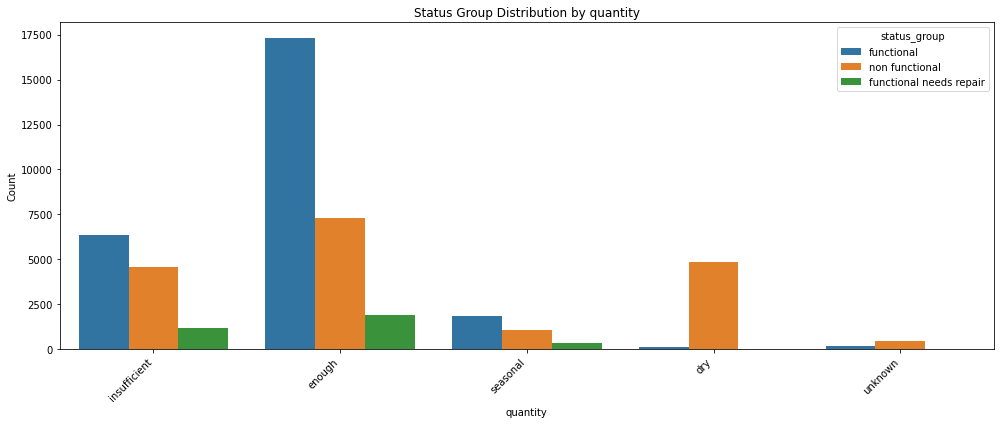

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='quantity', hue='status_group')
plt.title("Status Group Distribution by quantity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

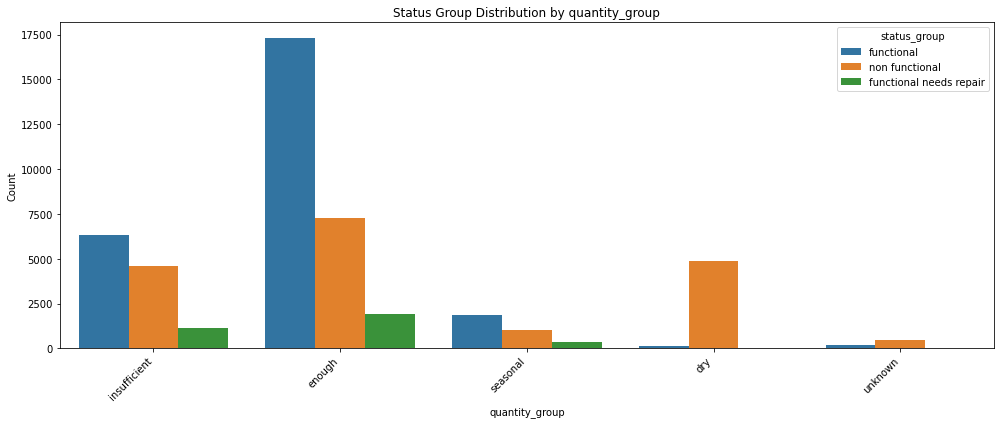

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='quantity_group', hue='status_group')
plt.title("Status Group Distribution by quantity_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("quantity_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: Yes, they are both similar and i drop the quantity_group

## extraction_type and extraction_type_group and extraction_type_class duplication

In [ ]:
# looks for the mismatch between extraction_type and extraction_type_group
mismatched = df_train[df_train['extraction_type'] != df_train['extraction_type_group']]
# Show a few rows where they differ
mismatched[['extraction_type', 'extraction_type_group']].head(10)

,extraction_type,extraction_type_group
22922,ksb,submersible
17063,ksb,submersible
267,windmill,wind-powered
5746,ksb,submersible
18923,ksb,submersible
22417,ksb,submersible
28961,other - rope pump,rope pump
32944,other - rope pump,rope pump
50346,other - swn 81,other handpump
25303,other - rope pump,rope pump


In [1446]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['extraction_type', 'extraction_type_group']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


             extraction_type extraction_type_group  count
2                        ksb           submersible   1111
5          other - rope pump             rope pump    376
6             other - swn 81        other handpump    178
8                   windmill          wind-powered     84
0                       cemo       other motorpump     74
4          other - play pump        other handpump     70
7                     walimi        other handpump     41
1                     climax       other motorpump     28
3  other - mkulima/shinyanga        other handpump      2


In [ ]:
matched = df_train[df_train['extraction_type'] == df_train['extraction_type_group']]
# Show a few rows where they differ
mismatched[['extraction_type', 'extraction_type_group']].head(10)

,extraction_type,extraction_type_group
22922,ksb,submersible
17063,ksb,submersible
267,windmill,wind-powered
5746,ksb,submersible
18923,ksb,submersible
22417,ksb,submersible
28961,other - rope pump,rope pump
32944,other - rope pump,rope pump
50346,other - swn 81,other handpump
25303,other - rope pump,rope pump


In [1448]:
# Count how often each mismatch occurs
match_summary = matched.groupby(['extraction_type', 'extraction_type_group']).size().reset_index(name='count')
print(match_summary.sort_values(by='count', ascending=False))


  extraction_type extraction_type_group  count
1         gravity               gravity  21340
5     nira/tanira           nira/tanira   6566
6           other                 other   5150
7     submersible           submersible   3851
8          swn 80                swn 80   2965
4            mono                  mono   2284
2   india mark ii         india mark ii   1920
0         afridev               afridev   1409
3  india mark iii        india mark iii     71


My conclusion is that i can drop this column as it is so similar to eachother but the extraction_type_group is with less detailed. The same i observe for the waterpoint_type and waterpoint_type_group, and i decided to keep the waterpoint_type_group. 

In [ ]:
# duplicate between 'extraction_type', 'extraction_type_group', 'extraction_type_class'
columns = ['extraction_type', 'extraction_type_group', 'extraction_type_class']

for col in columns:
    print(f"\n {col} — Unique Values and Frequencies:\n{'-'*50}")
    
    # Get value counts (number and percent)
    counts = df_train[col].value_counts(dropna=False)
    percentages = df_train[col].value_counts(normalize=True, dropna=False) * 100

    # Combine into a single DataFrame
    summary = pd.DataFrame({
        'Count': counts,
        'Percentage': percentages.round(2)
    })
    
    # Print top values
    print(summary.head(10)) 



 extraction_type — Unique Values and Frequencies:
--------------------------------------------------
                   Count  Percentage
gravity            21340       44.91
nira/tanira         6566       13.82
other               5150       10.84
submersible         3851        8.10
swn 80              2965        6.24
mono                2284        4.81
india mark ii       1920        4.04
afridev             1409        2.97
ksb                 1111        2.34
other - rope pump    376        0.79

 extraction_type_group — Unique Values and Frequencies:
--------------------------------------------------
                Count  Percentage
gravity         21340       44.91
nira/tanira      6566       13.82
other            5150       10.84
submersible      4962       10.44
swn 80           2965        6.24
mono             2284        4.81
india mark ii    1920        4.04
afridev          1409        2.97
rope pump         376        0.79
other handpump    291        0.61

 extract

In [ ]:
# Create a column to flag mismatches
df_train['extraction_mismatch'] = ~(
    (df_train['extraction_type'] == df_train['extraction_type_group']) &
    (df_train['extraction_type'] == df_train['extraction_type_class']) &
    (df_train['extraction_type_group'] == df_train['extraction_type_class'])
)

#Filter mismatched rows
mismatches = df_train[df_train['extraction_mismatch']][[
    'extraction_type', 'extraction_type_group', 'extraction_type_class'
]]

#Summarize mismatch patterns
mismatch_summary = mismatches.groupby([
    'extraction_type', 'extraction_type_group', 'extraction_type_class'
]).size().reset_index(name='count').sort_values(by='count', ascending=False)

# print top 10 mismatch patterns
print(mismatch_summary.head(10))


      extraction_type extraction_type_group extraction_type_class  count
7         nira/tanira           nira/tanira              handpump   6566
12             swn 80                swn 80              handpump   2965
6                mono                  mono             motorpump   2284
3       india mark ii         india mark ii              handpump   1920
0             afridev               afridev              handpump   1409
5                 ksb           submersible           submersible   1111
10  other - rope pump             rope pump             rope pump    376
11     other - swn 81        other handpump              handpump    178
14           windmill          wind-powered          wind-powered     84
1                cemo       other motorpump             motorpump     74


So i decided to keep the less details classification. Later we need to check if there is any relation between the extraction_type_class and the target

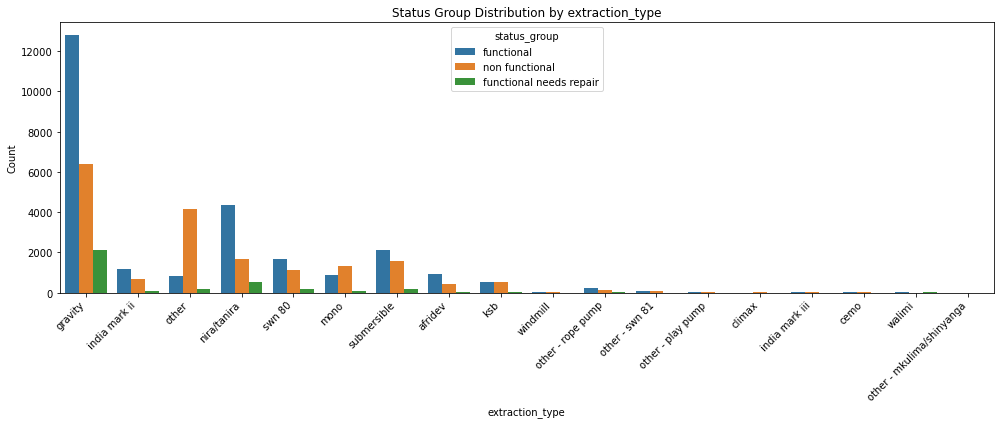

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type', hue='status_group')
plt.title("Status Group Distribution by extraction_type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

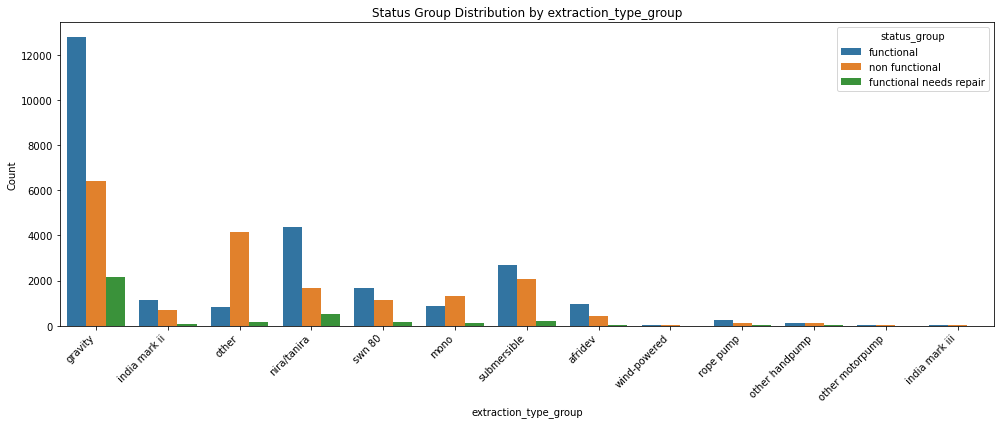

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type_group', hue='status_group')
plt.title("Status Group Distribution by extraction_type_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

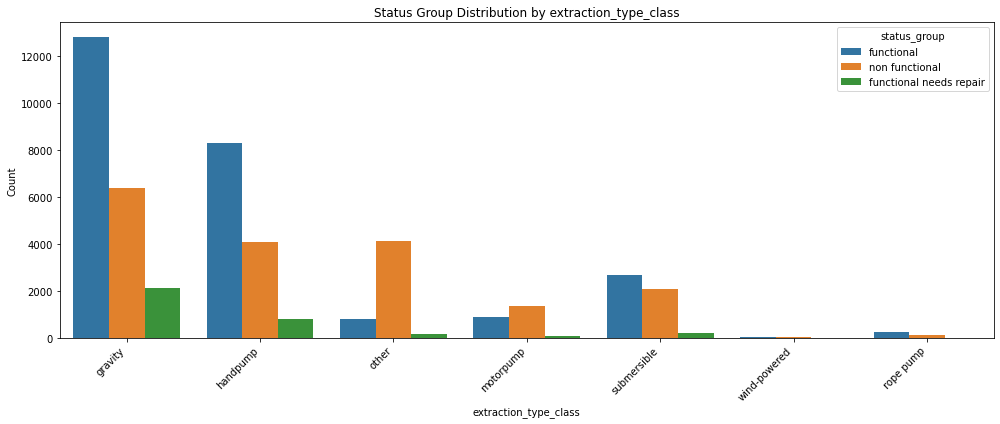

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='extraction_type_class', hue='status_group')
plt.title("Status Group Distribution by extraction_type_class")
plt.xticks(rotation=45, ha='right')
plt.xlabel("extraction_type_class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: we decided to keep the extraction_type_class as it more comprehensive and drop the extraction_type and extraction_type_group.. 

## waterpoint_type and waterpoint_type_group duplication

In [ ]:
# Calculate row-wise match
match_mask = df_train['waterpoint_type'] == df_train['waterpoint_type_group']

# Percentage of exact matches
match_percentage = match_mask.mean() * 100
print(f"Match Rate: {match_percentage:.2f}%")

# Count of matching vs mismatching rows
match_counts = match_mask.value_counts()
print("\nMatch vs Mismatch Counts:")
print(match_counts)

# show mismatched combinations
mismatches = df_train[~match_mask][['waterpoint_type', 'waterpoint_type_group']]
mismatch_summary = mismatches.groupby(
    ['waterpoint_type', 'waterpoint_type_group']
).size().reset_index(name='count').sort_values(by='count', ascending=False)

print("\nTop Mismatch Patterns:")
print(mismatch_summary.head(10))


Match Rate: 89.84%

Match vs Mismatch Counts:
True     42690
False     4830
dtype: int64

Top Mismatch Patterns:
               waterpoint_type waterpoint_type_group  count
0  communal standpipe multiple    communal standpipe   4830


In [1455]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['waterpoint_type', 'waterpoint_type_group']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


               waterpoint_type waterpoint_type_group  count
1           communal standpipe    communal standpipe   1021
3                    hand pump             hand pump    590
2  communal standpipe multiple    communal standpipe    296
4                        other                 other     54
0                cattle trough         cattle trough      3


interpretation: they are almost similar. in waterpoint_type there is one type communal standpoint multiple that it is changed to communal standpipe in the other. So i prefer to keep the waterpoint_type maybe this multiple type has any impact on functionality of pupm.

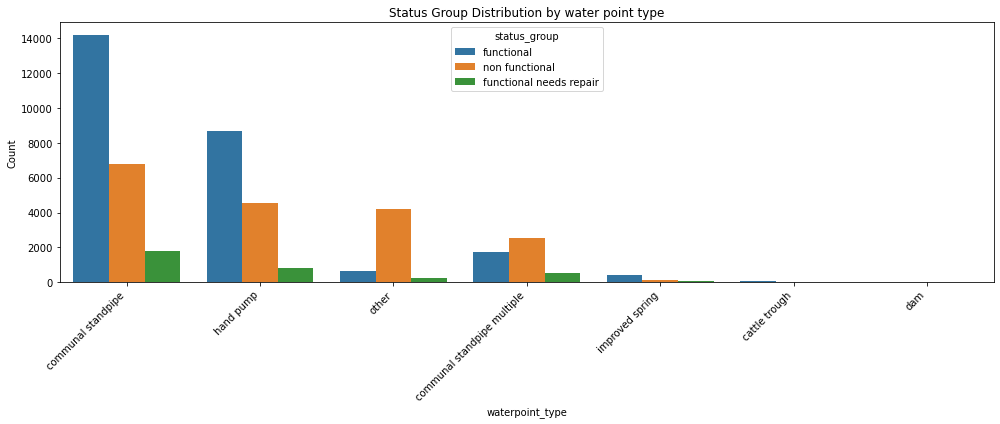

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='waterpoint_type', hue='status_group')
plt.title("Status Group Distribution by water point type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("waterpoint_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

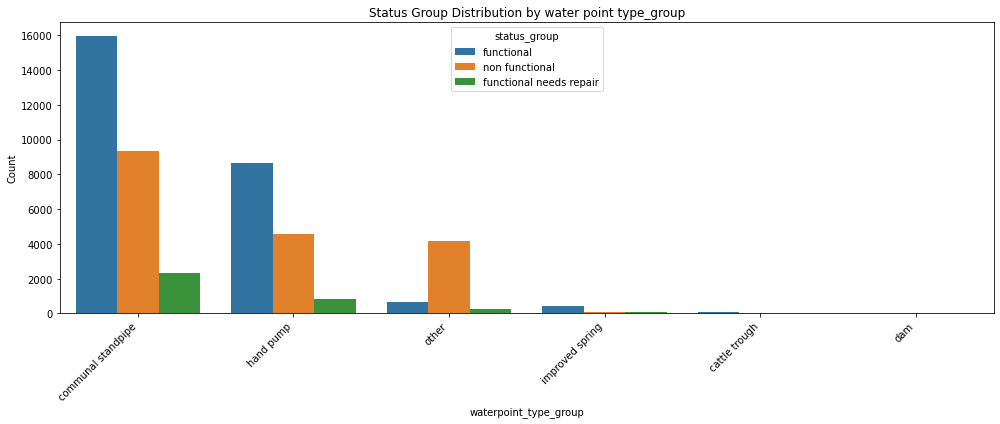

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='waterpoint_type_group', hue='status_group')
plt.title("Status Group Distribution by water point type_group")
plt.xticks(rotation=45, ha='right')
plt.xlabel("waterpoint_type_group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Source and Source_type duplication

In [1458]:
# Count how often each mismatch occurs
mismatch_summary = mismatched.groupby(['source', 'source_type']).size().reset_index(name='count')
print(mismatch_summary.sort_values(by='count', ascending=False))


                 source           source_type  count
6                 river            river/lake    660
3           machine dbh              borehole    415
7          shallow well          shallow well    326
8                spring                spring    165
0                   dam                   dam    141
2                  lake            river/lake    109
1              hand dtw              borehole     97
5  rainwater harvesting  rainwater harvesting     44
4                 other                 other      4
9               unknown                 other      3


In [ ]:
# Check for exact matches
match_mask = df_train['source'] == df_train['source_type']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'source' and 'source_type': {match_percentage:.2f}%")

 Match Rate between 'source' and 'source_type': 62.27%


In [ ]:
# View mismatch patterns
mismatches = df_train[~match_mask][['source', 'source_type']]
mismatch_summary = mismatches.groupby(['source', 'source_type']).size().reset_index(name='count')
print("\nTop mismatches:")
print(mismatch_summary.sort_values(by='count', ascending=False).head(10))


Top mismatches:
        source source_type  count
2  machine dbh    borehole   8849
3        river  river/lake   7719
0     hand dtw    borehole    701
1         lake  river/lake    606
4      unknown       other     56


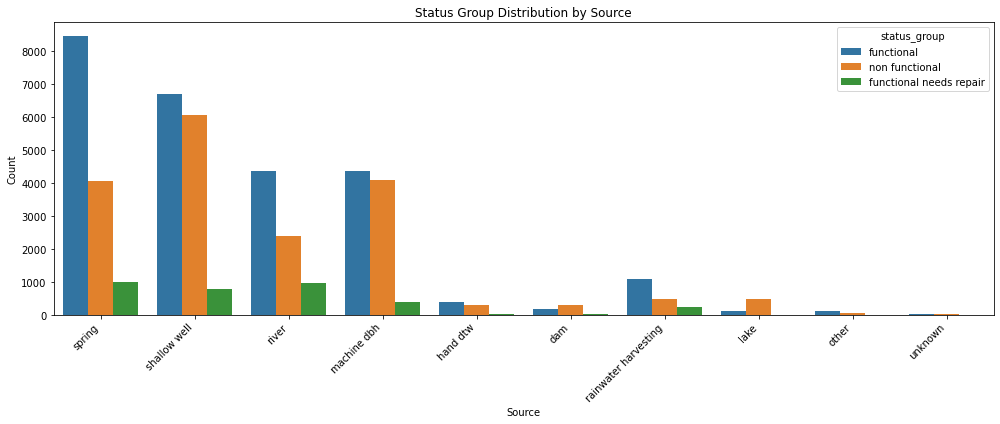

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='source', hue='status_group')
plt.title("Status Group Distribution by Source")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Source")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

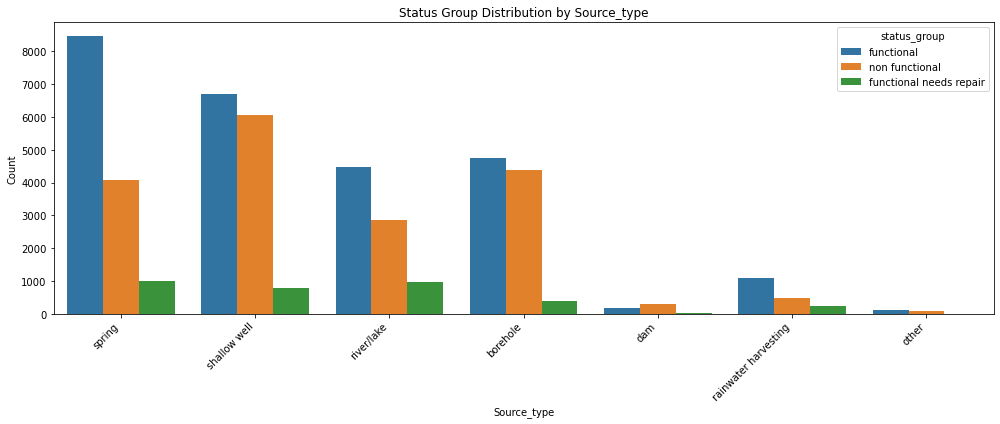

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_train, x='source_type', hue='status_group')
plt.title("Status Group Distribution by Source_type")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Source_type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: I think i will keep the source and delete the source type. They are similar and the relation between them and the status group also is similar but in source the river and lake are seperated and their relation with target is also different.

## Payment and Peyment_type duplication

In [ ]:
# Check for exact matches
match_mask = df_train['payment'] == df_train['payment_type']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'payment' and 'payment_type': {match_percentage:.2f}%")

 Match Rate between 'payment' and 'payment_type': 58.26%


In [ ]:
# View mismatch patterns
mismatches = df_train[~match_mask][['payment', 'payment_type']]
mismatch_summary = mismatches.groupby(['payment', 'payment_type']).size().reset_index(name='count')
print("\nTop mismatches:")
print(mismatch_summary.sort_values(by='count', ascending=False).head(10))


Top mismatches:
                 payment payment_type  count
2         pay per bucket   per bucket   7223
1            pay monthly      monthly   6574
3  pay when scheme fails   on failure   3154
0           pay annually     annually   2886


Interpretation: payment and payment_type are similar better to drop payment as the classification topic is better in payment_type.

# Installer and Funder

In [ ]:
df_train['installer'] = df_train['installer'].astype(str).str.strip().str.lower()
df_train['funder'] = df_train['funder'].astype(str).str.strip().str.lower()

In [ ]:
# Check for exact matches
match_mask = df_train['installer'] == df_train['funder']
match_percentage = match_mask.mean() * 100
print(f" Match Rate between 'installer' and 'funder': {match_percentage:.2f}%")

 Match Rate between 'installer' and 'funder': 37.87%


Interpretation: I think we need to keep both

In [ ]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,quantity_match,extraction_mismatch
3607,454,50.0,2013-02-27,dmdd,2092,dmdd,35.426020,-4.227446,Narmo,0,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,True,False
50870,510,0.0,2011-03-17,cmsr,0,gove,35.510074,-5.724555,Lukali,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,True,True
20413,14146,0.0,2011-07-10,kkkt,0,kkkt,32.499866,-9.081222,Mahakama,0,...,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,True,False
52806,47410,0.0,2011-04-12,nan,0,nan,34.060484,-8.830208,Shule Ya Msingi Chosi A,0,...,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,non functional,True,False
50091,1288,300.0,2011-04-05,ki,1023,ki,37.032690,-6.040787,Kwa Mjowe,0,...,enough,enough,shallow well,shallow well,groundwater,other,other,non functional,True,False


## Drop columns

In [ ]:
# Drop some column
columns_to_drop = ['recorded_by', 'id', 'num_private', 'quantity_group', 'extraction_type', 'extraction_type_group','waterpoint_type_group', 'source_type', 'payment', 'quantity_match', 'extraction_mismatch']
df_train.drop(columns = columns_to_drop, inplace = True)
print('droped successfuly!')

droped successfuly!


In [ ]:
df_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management,management_group,payment_type,water_quality,quality_group,quantity,source,source_class,waterpoint_type,status_group
3607,50.0,2013-02-27,dmdd,2092,dmdd,35.426020,-4.227446,Narmo,internal,Bashnet Kati,...,water board,user-group,per bucket,soft,good,insufficient,spring,groundwater,communal standpipe,functional
50870,0.0,2011-03-17,cmsr,0,gove,35.510074,-5.724555,Lukali,internal,Lukali,...,vwc,user-group,never pay,soft,good,enough,shallow well,groundwater,hand pump,functional
20413,0.0,2011-07-10,kkkt,0,kkkt,32.499866,-9.081222,Mahakama,lake rukwa,Chawalikozi,...,vwc,user-group,never pay,soft,good,enough,shallow well,groundwater,other,non functional
52806,0.0,2011-04-12,nan,0,nan,34.060484,-8.830208,Shule Ya Msingi Chosi A,rufiji,Shuleni,...,vwc,user-group,monthly,soft,good,insufficient,river,surface,communal standpipe,non functional
50091,300.0,2011-04-05,ki,1023,ki,37.032690,-6.040787,Kwa Mjowe,wami / ruvu,Ngholong,...,vwc,user-group,on failure,salty,salty,enough,shallow well,groundwater,other,non functional


# Handling missing values

In [ ]:
missing_counts = df_train.isnull().sum().sort_values(ascending=False)
missing_counts

scheme_name              22523
construction_year        16503
public_meeting            2689
permit                    2439
subvillage                 296
scheme_management            0
waterpoint_type              0
source_class                 0
source                       0
quantity                     0
quality_group                0
water_quality                0
payment_type                 0
management_group             0
management                   0
extraction_type_class        0
amount_tsh                   0
date_recorded                0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
installer                    0
gps_height                   0
funder                       0
status_group                 0
dtype: i

## how to impute Scheme_name missing values

In [ ]:
df_train['scheme_name']= df_train['scheme_name'].fillna('unknown')

In [ ]:
missing_counts = df_train.isnull().sum().sort_values(ascending=False)
missing_counts

construction_year        16503
public_meeting            2689
permit                    2439
subvillage                 296
scheme_management            0
waterpoint_type              0
source_class                 0
source                       0
quantity                     0
quality_group                0
water_quality                0
payment_type                 0
management_group             0
management                   0
extraction_type_class        0
scheme_name                  0
amount_tsh                   0
date_recorded                0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
wpt_name                     0
latitude                     0
longitude                    0
installer                    0
gps_height                   0
funder                       0
status_group                 0
dtype: i

## How to impute the construction_year

## Checkig the missingness correlation of construction year with other features

In [1473]:
def make_construction_year_corr_plot(df):
    """
    Create a heatmap showing correlation of construction_year with other numerical features.
    """
    # Ensure construction_year is numeric
    df['construction_year'] = pd.to_numeric(df['construction_year'], errors='coerce')

    # Select numerical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Compute correlation matrix
    corr = df[numeric_cols].corr()

    # Filter only correlations with construction_year
    corr = corr[['construction_year']].drop('construction_year')

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(8, len(corr) * 0.5), dpi=150, facecolor='white')

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
     # Draw the heatmap
    sns.heatmap(corr, annot=True, cmap=cmap, center=0, linewidths=0.5, cbar_kws={"shrink": 0.5})

    plt.title('Correlation with Construction Year')
    plt.tight_layout()
    plt.show()



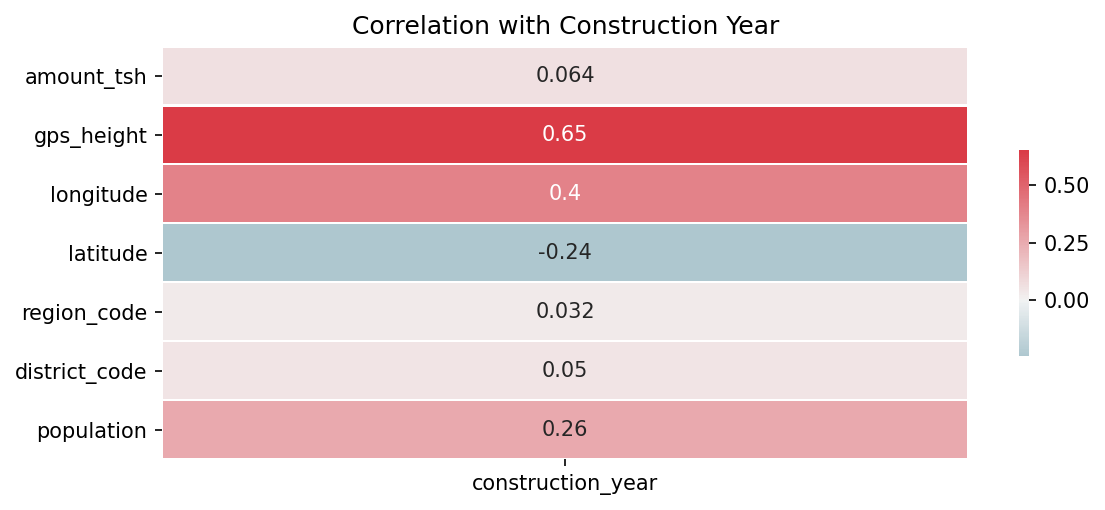

In [ ]:
make_construction_year_corr_plot(df_train)

we need to fill drop data here! and the rest maybe is better to shift to the feature analysis

# I am not sure abot what i did later!

# Analyze Cardinality of Categorical Features

In [ ]:
# Summary of categorical columns
cat_summary = df_train.select_dtypes(include='object').nunique().sort_values(ascending=False)
print(cat_summary)


wpt_name                 30742
subvillage               17232
scheme_name               2542
ward                      2076
installer                 1742
funder                    1699
lga                        125
region                      21
management                  12
source                      10
water_quality                8
extraction_type_class        7
payment_type                 7
waterpoint_type              7
quality_group                6
management_group             5
quantity                     5
source_class                 3
status_group                 3
dtype: int64


# Categorize them as low or high cardinality

In [1476]:
# Recalculate high cardinality columns
high_card_cols = cat_summary[cat_summary > 10].index.tolist()
high_card_cols

['wpt_name',
 'subvillage',
 'scheme_name',
 'ward',
 'installer',
 'funder',
 'lga',
 'region',
 'management']

In [1477]:
# Select low cardinality columns (2–10 unique values)
low_card_cols = cat_summary[(cat_summary <= 10) & (cat_summary > 1)].index.tolist()
low_card_cols

['source',
 'water_quality',
 'extraction_type_class',
 'payment_type',
 'waterpoint_type',
 'quality_group',
 'management_group',
 'quantity',
 'source_class',
 'status_group']

## Implement Encoding

## One-Hot Encode Low Cardinality Columns

In [ ]:
# Apply One-Hot Encode Low Cardinality
df_encoded = pd.get_dummies(df_train, columns=low_card_cols, drop_first=True)

# Preview result
print(f"Total new shape: {df_train.shape}")
print("First few column names:", df_train.columns[:10].tolist())

Total new shape: (47520, 32)
First few column names: ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage']


## Frequency Encode High Cardinality Columns

In [ ]:
# Apply frequency encoding
for col in high_card_cols:
    freq_map = df_train[col].value_counts().to_dict()
    df_train[col + '_freq'] = df_train[col].map(freq_map)

In [ ]:
# Check result
print("Final encoded shape:", df_train)
df_train.head()

Final encoded shape:        amount_tsh date_recorded                  funder  gps_height  \
3607         50.0    2013-02-27                    dmdd        2092   
50870         0.0    2011-03-17                    cmsr           0   
20413         0.0    2011-07-10                    kkkt           0   
52806         0.0    2011-04-12                     nan           0   
50091       300.0    2011-04-05                      ki        1023   
...           ...           ...                     ...         ...   
54343      1000.0    2011-03-20                     dhv         327   
38158      1000.0    2011-03-10                  danida        1743   
860           0.0    2011-03-13               omar ally         -13   
15795         0.0    2012-10-31                   rwssp           0   
56422         0.0    2013-02-24  government of tanzania        1290   

              installer  longitude  latitude                 wpt_name  \
3607               dmdd  35.426020 -4.227446         

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,status_group,wpt_name_freq,subvillage_freq,scheme_name_freq,ward_freq,installer_freq,funder_freq,lga_freq,region_freq,management_freq
3607,50.0,2013-02-27,dmdd,2092,dmdd,35.426020,-4.227446,Narmo,internal,Bashnet Kati,...,functional,1,5.0,22523,17,308,149,400,1266,2326
50870,0.0,2011-03-17,cmsr,0,gove,35.510074,-5.724555,Lukali,internal,Lukali,...,functional,1,1.0,22523,10,172,62,174,1755,32455
20413,0.0,2011-07-10,kkkt,0,kkkt,32.499866,-9.081222,Mahakama,lake rukwa,Chawalikozi,...,non functional,10,1.0,22523,47,741,1047,844,3659,32455
52806,0.0,2011-04-12,nan,0,nan,34.060484,-8.830208,Shule Ya Msingi Chosi A,rufiji,Shuleni,...,non functional,1,409.0,22523,66,2889,2876,491,3659,32455
50091,300.0,2011-04-05,ki,1023,ki,37.032690,-6.040787,Kwa Mjowe,wami / ruvu,Ngholong,...,non functional,1,1.0,22523,53,82,102,876,3223,32455


# Check for and Handle Outliers in Numerical Features

## Identify Numerical Columns

In [ ]:
# Get numeric columns, but exclude ID or code-like columns
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
excluded = ['region_code', 'district_code']  # Don't plot these
numeric_cols = [col for col in numeric_cols if col not in excluded]
numeric_cols

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'population',
 'construction_year',
 'wpt_name_freq',
 'subvillage_freq',
 'scheme_name_freq',
 'ward_freq',
 'installer_freq',
 'funder_freq',
 'lga_freq',
 'region_freq',
 'management_freq']

# Visualize Distributions

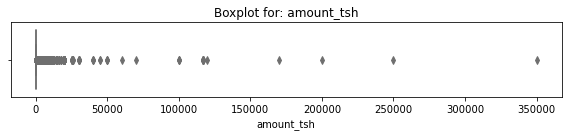

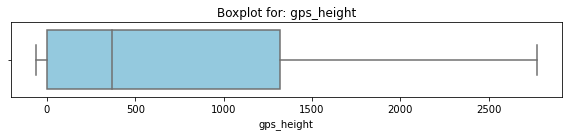

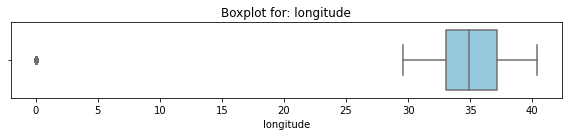

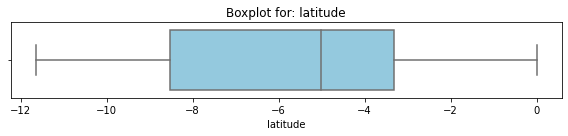

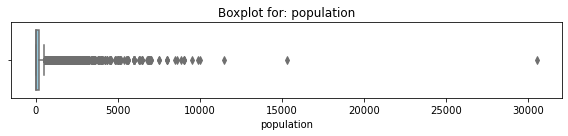

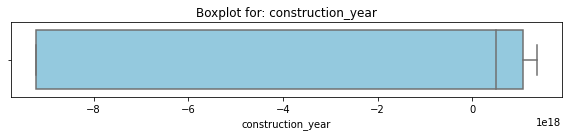

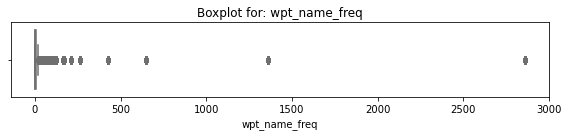

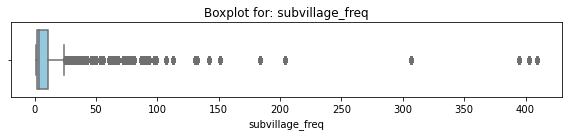

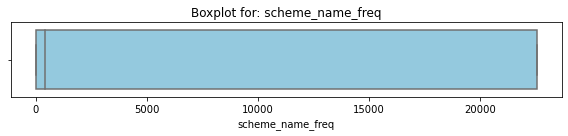

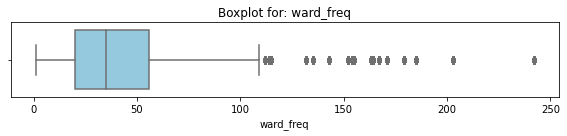

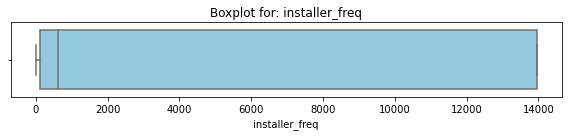

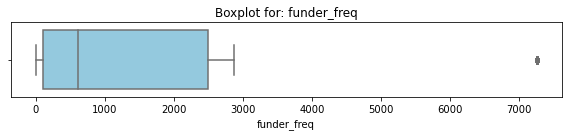

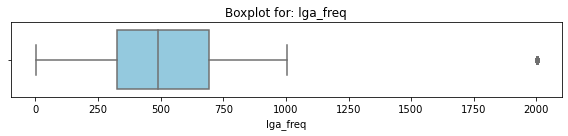

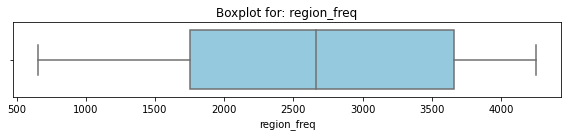

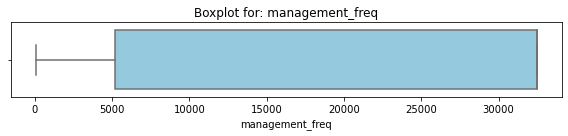

In [ ]:
# Loop and plot boxplot for each column
for col in numeric_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df_train[col], color='skyblue')
    plt.title(f'Boxplot for: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Detect Outliers (Statistical Methods)

In [ ]:
# Cap Outliers Using IQR and Flag Them
def cap_outliers_iqr(df, column):
    # Backup original values
    df[f'{column}_before_clip'] = df[column]

# Calculates lower and upper bounds for acceptable values using IQR
    # Calculate IQR bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Flag which values were outliers
    df[f'{column}_was_outlier'] = (df[column] < lower) | (df[column] > upper)

    # Apply clipping
    df[column] = df[column].clip(lower, upper)

    print(f"{column}: Capped outliers outside [{lower:.2f}, {upper:.2f}]")
    return df

# Apply to selected columns
columns_to_cap = ['amount_tsh', 'population', 'gps_height','longitude', 'latitude']

for col in columns_to_cap:
    df_train = cap_outliers_iqr(df_train, col)

amount_tsh: Capped outliers outside [-30.00, 50.00]
population: Capped outliers outside [-319.50, 532.50]
gps_height: Capped outliers outside [-1980.00, 3300.00]
longitude: Capped outliers outside [26.94, 43.32]
latitude: Capped outliers outside [-16.34, 4.48]


In [ ]:
print("Filtering rows with valid GPS coordinates within Tanzania")

# Define valid bounds
valid_longitude = (df_train['longitude'] > 29) & (df_train['longitude'] < 41)
valid_latitude = (df_train['latitude'] > -12) & (df_train['latitude'] < -1)

# Keep only rows within the valid GPS bounding box
df_train = df_train[valid_longitude & valid_latitude]

print(f"Remaining rows after filtering: {len(df_train)}")

Filtering rows with valid GPS coordinates within Tanzania
Remaining rows after filtering: 46082


In [ ]:
# Sanity check for any outliers that remain
print(df_train['longitude'].min(), df_train['longitude'].max())
print(df_train['latitude'].min(), df_train['latitude'].max())

29.6071219 40.34519307
-11.64944018 -1.00058519


In [ ]:
def show_before_after(col):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 2))
    sns.boxplot(x=df_train[f"{col}_before_clip"], ax=axes[0], color='skyblue')
    axes[0].set_title(f'Before Clipping: {col}')
    sns.boxplot(x=df_train[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'After Clipping: {col}')
    for ax in axes:
        ax.grid(True)
        ax.set_xlabel('')
    plt.tight_layout()
    plt.show()


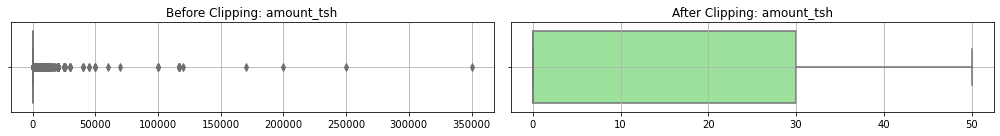

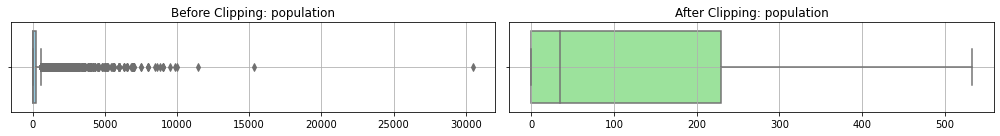

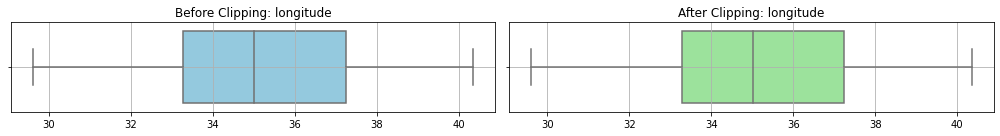

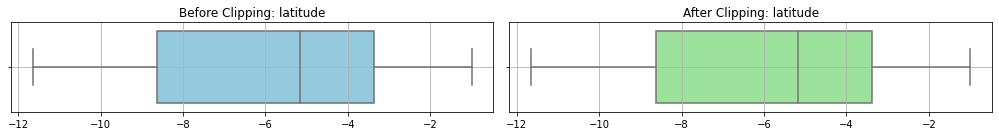

In [1487]:
show_before_after('amount_tsh')
show_before_after('population')
show_before_after('longitude')
show_before_after('latitude')

# Normalize / Standardize Numerical Features
th goal is to make sure all the numerical features are on the same scale.

In [1488]:
# Select Numeric Columns to Scale
columns_to_scale = ['amount_tsh', 'population', 'gps_height']

In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])
print(df_train[columns_to_scale].describe().T)

              count          mean       std       min       25%       50%  \
amount_tsh  46082.0 -1.820359e-15  1.000011 -0.620113 -0.620113 -0.620113   
population  46082.0 -1.060786e-17  1.000011 -0.751240 -0.751240 -0.552146   
gps_height  46082.0  8.498331e-17  1.000011 -1.085407 -0.994549 -0.380179   

                 75%       max  
amount_tsh  0.797484  1.742548  
population  0.557093  2.277835  
gps_height  0.927520  3.000299  


<ipython-input-1489-07ff07100729>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_cleaned[columns_to_scale] = scaler.fit_transform(df_train_cleaned[columns_to_scale])
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [1490]:
# save the scaler
joblib.dump(scaler, '../data/processed/standard_scaler.pkl')

['../data/processed/standard_scaler.pkl']

Tip: Numerical features were scaled using StandardScaler to normalize magnitudes and improve model convergence. 

# Build a Data Cleaning Pipeline

In [1491]:
# Define the IQRClipper
class IQRClipper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.bounds = {}

    def fit(self, X, y=None):
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            self.bounds[col] = (lower, upper)
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            lower, upper = self.bounds[col]
            X[col] = X[col].clip(lower, upper)
        return X

In [ ]:
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
boolean_features = df_train.select_dtypes(include=['bool']).columns.tolist()

In [1493]:
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)
print("Boolean Features:", boolean_features)

Numeric Features: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population', 'construction_year', 'wpt_name_freq', 'subvillage_freq', 'scheme_name_freq', 'ward_freq', 'installer_freq', 'funder_freq', 'lga_freq', 'region_freq', 'management_freq', 'amount_tsh_before_clip', 'population_before_clip', 'gps_height_before_clip', 'longitude_before_clip', 'latitude_before_clip']
Categorical Features: ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type_class', 'management', 'management_group', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type', 'status_group']
Boolean Features: ['public_meeting', 'permit', 'amount_tsh_was_outlier', 'population_was_outlier', 'gps_height_was_outlier', 'longitude_was_outlier', 'latitude_was_outlier']


In [1494]:
# define the pipelines

# Numeric preprocessing
numeric_pipeline = Pipeline([
    ('iqr_clip', IQRClipper(columns=numeric_cols)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Boolean preprocessing (optional: cast to int or handle as-is)
boolean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


In [1495]:
# combine into full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features),
    ('bool', boolean_pipeline, boolean_features)
])

In [1496]:
# wrap the final pipeline 
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [1497]:
# save the pipeline for later use
joblib.dump(final_pipeline, '../data/processed/data_cleaning_pipeline.pkl')


['../data/processed/data_cleaning_pipeline.pkl']

In [ ]:
print(df_train.columns.tolist())

['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type_class', 'management', 'management_group', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_class', 'waterpoint_type', 'status_group', 'wpt_name_freq', 'subvillage_freq', 'scheme_name_freq', 'ward_freq', 'installer_freq', 'funder_freq', 'lga_freq', 'region_freq', 'management_freq', 'amount_tsh_before_clip', 'amount_tsh_was_outlier', 'population_before_clip', 'population_was_outlier', 'gps_height_before_clip', 'gps_height_was_outlier', 'longitude_before_clip', 'longitude_was_outlier', 'latitude_before_clip', 'latitude_was_outlier']


In [1499]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_features)
])

In [1500]:
print(final_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iqr_clip',
                                                                   IQRClipper(columns=['amount_tsh',
                                                                                       'gps_height',
                                                                                       'longitude',
                                                                                       'latitude',
                                                                                       'population',
                                                                                       'construction_year',
                                                                                       'wpt_name_freq',
                                                                                       'subvillage_freq',
           

In [1501]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('iqr_clip',
                                                                   IQRClipper(columns=['amount_tsh',
                                                                                       'gps_height',
                                                                                       'longitude',
                                                                                       'latitude',
                                                                                       'population',
                                                                                       'construction_year',
                                                                                       'wpt_name_freq',
                                                                                       'subvillage_freq',
                                                                                       'scheme_name_freq',
                                                                                       'ward_freq',
                                                                                       'installer_freq',
                                                                                       'funder_freq',
                                                                                       'lga_freq',
                                                                                       'region_freq',
                                                                                       'management_freq'])),
                                                                  ('imput...
                                                   'payment_type',
                                                   'water_quality',
                                                   'quality_group', 'quantity',
                                                   'source', 'source_class',
                                                   'waterpoint_type',
                                                   'status_group']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['public_meeting', 'permit',
                                                   'amount_tsh_was_outlier',
                                                   'population_was_outlier',
                                                   'gps_height_was_outlier',
                                                   'longitude_was_outlier',
                                                   'latitude_was_outlier'])]))])

In [ ]:
# Save the cleaned data to CSV
df_train.to_csv("../data/processed/cleaned_merged_data.csv", index=False)
print("Cleaned dataset saved successfully to: ../data/processed/cleaned_merged_data.csv")

Cleaned dataset saved successfully to: ../data/processed/cleaned_merged_data.csv
